In [ ]:
#Rieslynn Bernier

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
#reading files in
hydro1_data = pd.read_csv('C:/Users/Riesl/Downloads/hydrogen_1.csv')
hydro2_data = pd.read_csv('C:/Users/Riesl/Downloads/hydrogen_2.csv')
deuter1_data = pd.read_csv('C:/Users/Riesl/Downloads/deuterium_1.csv')
deuter1_data = pd.read_csv('C:/Users/Riesl/Downloads/deuterium_2.csv')

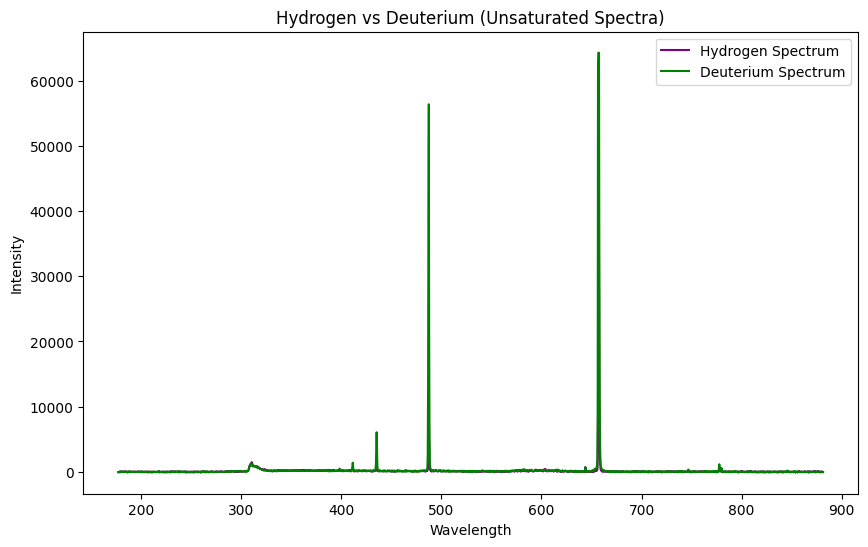

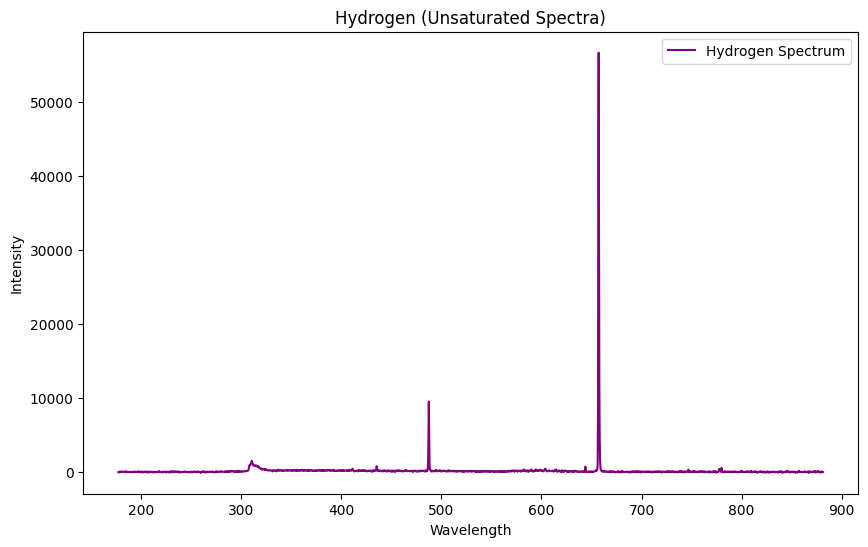

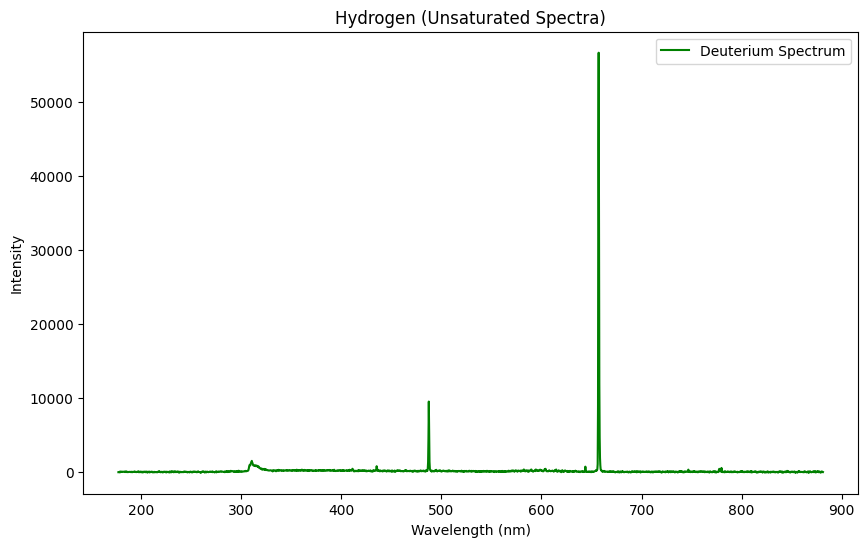

In [23]:
#Problem 2

#Plotting hydrogen and deuterium spectra 1
plt.figure(figsize=(10, 6))
plt.plot(hydro1_data['Wavelength'], hydro1_data['Intensity'], label='Hydrogen Spectrum', color='purple')
plt.plot(deuter1_data['Wavelength'], deuter1_data['Intensity'], label='Deuterium Spectrum', color='green')

#Labels
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Hydrogen vs Deuterium (Unsaturated Spectra)')
plt.legend()
plt.show()

#Separate graphs
plt.figure(figsize=(10, 6))
plt.plot(hydro1_data['Wavelength'], hydro1_data['Intensity'], label='Hydrogen Spectrum', color='purple')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Hydrogen (Unsaturated Spectra)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(deuter1_data['Wavelength'], hydro1_data['Intensity'], label='Deuterium Spectrum', color='green')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Hydrogen (Unsaturated Spectra)')
plt.legend()
plt.show()

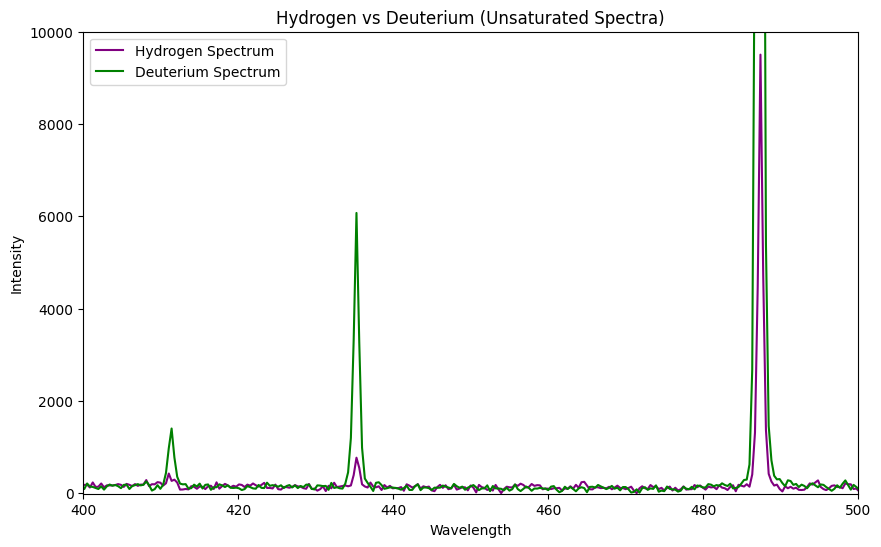

lambda= 657.15, I=  56645.97
lambda= 487.39, I=   9503.42
lambda= 435.27, I=    770.65
lambda= 411.05, I=    427.27
lambda= 392.86, I=    290.36


In [53]:
#Plotting hydrogen and deuterium spectra 1
plt.figure(figsize=(10, 6))
plt.plot(hydro1_data['Wavelength'], hydro1_data['Intensity'], label='Hydrogen Spectrum', color='purple')
plt.plot(deuter1_data['Wavelength'], deuter1_data['Intensity'], label='Deuterium Spectrum', color='green')

#Labels
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Hydrogen vs Deuterium (Unsaturated Spectra)')
plt.legend()
plt.axis([400,500,-10,10000])
plt.show()

#Checking for peaks
peak_criteria = 100
step_down_size = 10

#Data
data = hydro1_data
l_min = 365
l_max = 800
i_min = 0
i_max = 2048

#Finding peaks
while l_max > l_min + 1:

    i_min = hydro1_data[hydro1_data['Wavelength'] > l_min].index[0]
    i_max = hydro1_data[hydro1_data['Wavelength'] < l_max].index[-1]

    data = hydro1_data.loc[i_min:i_max]

    #Average and max intensity
    ave_I = data['Intensity'].mean()
    max_I = data['Intensity'].max()

    if max_I > ave_I + peak_criteria:
        #Maximum intensity
        index_max_I = data['Intensity'].idxmax()
        max_L = data.loc[index_max_I, 'Wavelength']

        print(f"lambda={max_L:7.2f}, I= {max_I:9.2f}")

        #Continue for more peaks
        l_max = max_L - step_down_size
    else:
        break  #When there are no more peaks

Calculated Theoretical Balmer Wavelengths:
   Wavelength  Intensity  Levels
0  656.335460   5664.597  3 to 2
1  486.174415   5664.597  4 to 2
2  434.084299   5664.597  5 to 2
3  410.209663   5664.597  6 to 2
4  397.042439   5664.597  7 to 2


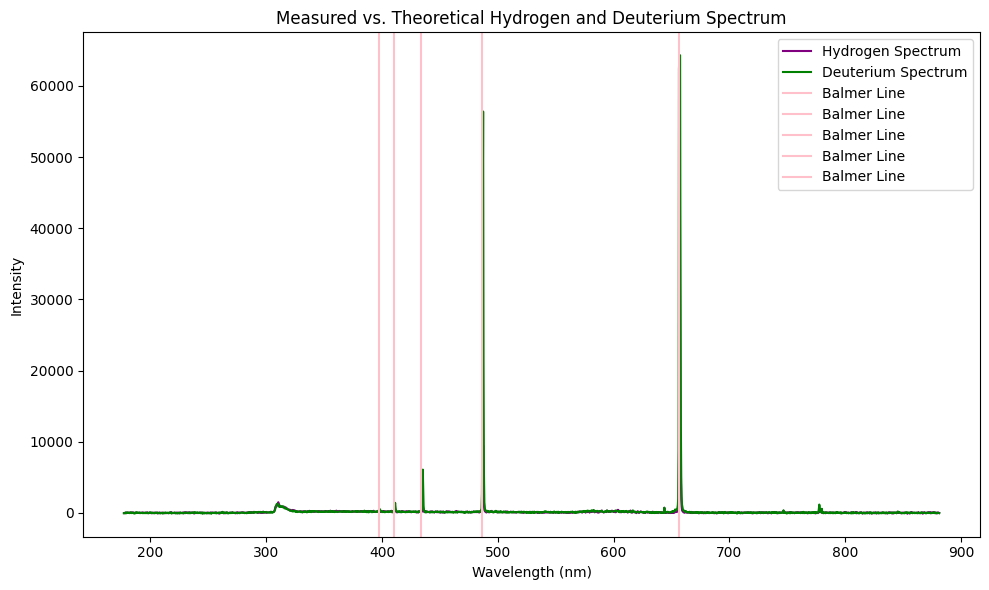

In [49]:
#Calculating Lambda using Balmer


# Calculate theoretical Balmer lines
R = 1.097e7
n_final = 2
n_values = [3, 4, 5, 6, 7]
lambda_balmer = [1 / (R * (1/n_final**2 - 1/n**2)) for n in n_values]
lambda_balmer_2 = [l * 1e9 for l in lambda_balmer]

#Print Calculations
balmer = pd.DataFrame({
    'Wavelength': lambda_balmer_2,
    'Intensity': intensity_balmer,
    'Levels': [f'{n} to {n_final}' for n in n_values]
})
print("Calculated Theoretical Balmer Wavelengths:")
print(balmer)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(hydro1_data['Wavelength'], hydro1_data['Intensity'], label='Hydrogen Spectrum', color='purple')
plt.plot(deuter1_data['Wavelength'], deuter1_data['Intensity'], label='Deuterium Spectrum', color='green')
for wl in balmer['Wavelength']:
    plt.axvline(x=wl, color='pink', label='Balmer Line')

plt.title('Measured vs. Theoretical Hydrogen and Deuterium Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()
plt.tight_layout()
plt.show()
